# AI Agents Ecosystem Analysis (2026 Signals)

This notebook analyzes early ecosystem signals related to AI Agents using aggregated data from:
- Community discussions (Hacker News)
- Academic research publications (ArXiv)
- Hiring demand signals (Remote job listings)

The objective is to understand **where AI Agents are gaining traction**, **who is driving the conversation**, and **how close the technology is to commercial adoption**.

In [2]:
import pandas as pd

## 1. Data Ingestion and Validation

We begin by loading the dataset and performing basic validation checks to ensure:
- The data loads correctly
- Expected columns are present
- No immediate structural issues exist

This step establishes a reliable foundation for downstream analysis.

In [8]:
df = pd.read_csv("Documents/AI_Agents_Ecosystem_2026.csv")

In [9]:
df.head()

,Title,Source,Date,Description,Link
0,Client Support Specialist at Clipboard Health,RemoteJob,2026-01-16,About the Role\n \nClipboard Health is looking...,https://remotive.com/remote-jobs/customer-serv...
1,Senior Independent AI Engineer / Architect at ...,RemoteJob,2026-01-16,"Location: Americas, Europe, or Israel\nThe Opp...",https://remotive.com/remote-jobs/software-deve...
2,Senior Independent Software Developer at A.Team,RemoteJob,2026-01-16,"You must be located in the Americas, Europe, o...",https://remotive.com/remote-jobs/software-deve...
3,"Show HN: Gambit, an open-source agent harness ...",HackerNews,2026-01-16,Hey HN!<p>Wanted to show our open source agent...,https://github.com/bolt-foundry/gambit
4,Show HN: Use-AI: trivially add AI automation t...,HackerNews,2026-01-16,"Points: 2, Comments: 0",https://github.com/meetsmore/use-ai


In [10]:
df.shape

(1206, 5)

In [11]:
df.columns

Index(['Title', 'Source', 'Date', 'Description', 'Link'], dtype='object')

**Observation:**
The dataset contains 1,206 records with five core fields.
Each row represents a *mention or artifact* related to AI Agents,
not a company, product, or deployed system.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1206 non-null   object
 1   Source       1206 non-null   object
 2   Date         1206 non-null   object
 3   Description  1206 non-null   object
 4   Link         1204 non-null   object
dtypes: object(5)
memory usage: 47.2+ KB


## 2. Date Normalization

Dates are converted into a standard datetime format to enable
time-based aggregation and trend analysis.

In [13]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [14]:
df["Date"].head()
df["Date"].dtype

dtype('<M8[ns]')

## 3. Understanding Data Sources and Signal Types

The dataset aggregates signals from three distinct sources, each reflecting
a different stage of ecosystem maturity:
- Hacker News: community and practitioner discourse
- ArXiv: academic and research-driven development
- Remote Jobs: early commercial hiring demand

In [15]:
df["Source"].value_counts()

Source
HackerNews    734
ArXiv         448
RemoteJob      24
Name: count, dtype: int64

<Axes: xlabel='Source'>

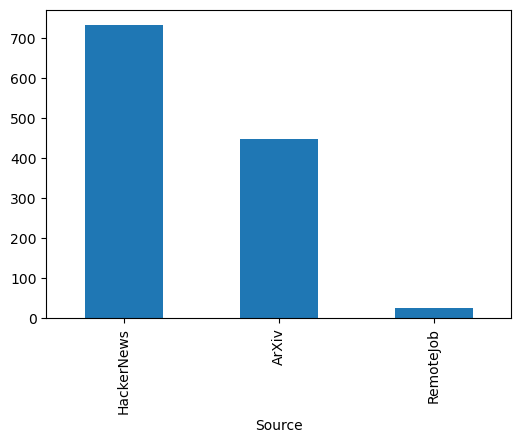

In [16]:
df["Source"].value_counts().plot(kind="bar", figsize=(6,4))

**Interpretation:**
Hacker News and ArXiv dominate the dataset, indicating that AI Agents are currently
shaped primarily by community exploration and academic research.
Hiring demand exists but remains limited.

## 4. Time-Based Trend Analysis

To distinguish sustained interest from short-term spikes,
we examine how AI Agent–related mentions evolve over time.

In [17]:
df.groupby("Date").size().sort_index()

Date
2009-07-01      1
2009-08-19      1
2009-08-23      1
2009-10-27      1
2009-12-20      1
             ... 
2026-01-12      4
2026-01-13     16
2026-01-14    140
2026-01-15    302
2026-01-16      5
Length: 557, dtype: int64

<Axes: xlabel='Date'>

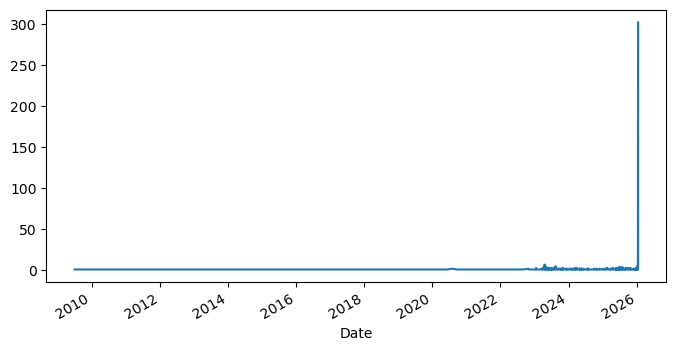

In [18]:
df.groupby("Date").size().plot(figsize=(8,4))

**Interpretation:**
Activity persists across multiple years, with increased density in recent periods.
This suggests continued engagement rather than a single hype-driven event.

## 5. Text Preparation

Descriptions are cleaned to remove formatting artifacts such as:
- Line breaks
- HTML tags
- Leading and trailing whitespace

This improves consistency for downstream text analysis.

In [19]:
df["Description"] = (
    df["Description"]
    .str.replace("\n", " ", regex=False)
    .str.replace(r"<.*?>", "", regex=True)
    .str.strip()
)

In [20]:
df["Description"].head()

0    About the Role   Clipboard Health is looking f...
1    Location: Americas, Europe, or Israel The Oppo...
2    You must be located in the Americas, Europe, o...
3    Hey HN!Wanted to show our open source agent ha...
4                               Points: 2, Comments: 0
Name: Description, dtype: object

## 6. Description Length Exploration

We analyze the length of descriptions to understand variability
between short community posts and longer job or research descriptions.

In [21]:
df["desc_length"] = df["Description"].str.len()
df["desc_length"].describe()

count    1206.000000
mean      266.890547
std       230.428865
min        22.000000
25%        24.000000
50%       354.000000
75%       500.000000
max       500.000000
Name: desc_length, dtype: float64

<Axes: ylabel='Frequency'>

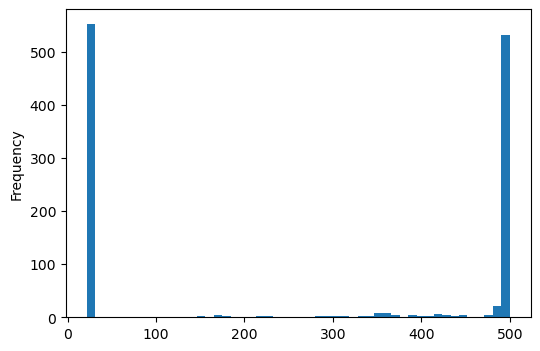

In [22]:
df["desc_length"].plot(kind="hist", bins=50, figsize=(6,4))

**Interpretation:**
The distribution shows a mix of very short and very long descriptions,
reflecting heterogeneous source types rather than uniform content.

## 7. Keyword Presence and Theme Identification

We examine how often AI-related terms appear in titles
to understand how explicitly AI Agents are referenced across sources.

In [23]:
df["is_ai"] = df["Title"].str.contains("AI", case=False, na=False)
df["is_ai"].value_counts()

is_ai
False    616
True     590
Name: count, dtype: int64

In [24]:
df.groupby("Source")["is_ai"].mean().sort_values(ascending=False)

Source
HackerNews    0.671662
RemoteJob     0.208333
ArXiv         0.205357
Name: is_ai, dtype: float64

**Interpretation:**
Hacker News titles reference AI more explicitly than ArXiv or job listings,
suggesting stronger keyword signaling in community discussions.

## 8. Exploratory Keyword Frequency Analysis

Word frequency analysis helps surface recurring concepts
and dominant themes in AI Agent–related titles.

In [25]:
from collections import Counter

words = (
    df["Title"]
    .str.lower()
    .str.replace(r"[^a-z ]", "", regex=True)
    .str.split()
)

word_counts = Counter(word for row in words for word in row)
word_counts.most_common(20)

[('ai', 363),
 ('for', 339),
 ('and', 285),
 ('the', 211),
 ('of', 207),
 ('a', 204),
 ('in', 201),
 ('hn', 198),
 ('with', 178),
 ('to', 148),
 ('show', 145),
 ('agents', 132),
 ('langchain', 127),
 ('automation', 126),
 ('agent', 91),
 ('on', 78),
 ('rag', 78),
 ('an', 63),
 ('autogpt', 60),
 ('models', 53)]

In [26]:
df.duplicated(subset=["Title", "Link"]).sum()

np.int64(0)

In [27]:
df = df.drop_duplicates(subset=["Title", "Link"])

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [29]:
words = (
    df["Title"]
    .str.lower()
    .str.replace(r"[^a-z ]", "", regex=True)
    .str.split()
)

filtered_words = [
    word
    for row in words
    for word in row
    if word not in ENGLISH_STOP_WORDS and len(word) > 2
]

from collections import Counter
Counter(filtered_words).most_common(20)

[('agents', 132),
 ('langchain', 127),
 ('automation', 126),
 ('agent', 91),
 ('rag', 78),
 ('autogpt', 60),
 ('models', 53),
 ('llm', 49),
 ('language', 47),
 ('learning', 42),
 ('reasoning', 42),
 ('using', 42),
 ('opensource', 40),
 ('framework', 36),
 ('ask', 36),
 ('rage', 36),
 ('llms', 33),
 ('large', 32),
 ('model', 31),
 ('systems', 30)]

In [30]:
normalized_words = [
    word.rstrip("s")
    for word in filtered_words
]
Counter(normalized_words).most_common(20)

[('agent', 223),
 ('automation', 136),
 ('langchain', 131),
 ('model', 84),
 ('rag', 83),
 ('llm', 82),
 ('autogpt', 61),
 ('language', 48),
 ('learning', 43),
 ('reasoning', 42),
 ('using', 42),
 ('rage', 42),
 ('opensource', 40),
 ('framework', 38),
 ('ask', 36),
 ('large', 32),
 ('system', 30),
 ('data', 28),
 ('autonomou', 24),
 ('app', 23)]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    ngram_range=(2, 2),
    stop_words="english",
    min_df=5
)

X = vectorizer.fit_transform(df["Title"])
bigrams = vectorizer.get_feature_names_out()

import numpy as np
counts = np.asarray(X.sum(axis=0)).ravel()

bigram_counts = sorted(
    zip(bigrams, counts),
    key=lambda x: x[1],
    reverse=True
)

bigram_counts[:15]

[('ai agents', np.int64(96)),
 ('ai automation', np.int64(92)),
 ('ai agent', np.int64(55)),
 ('open source', np.int64(52)),
 ('ask hn', np.int64(36)),
 ('language models', np.int64(28)),
 ('large language', np.int64(26)),
 ('auto gpt', np.int64(20)),
 ('launch hn', np.int64(16)),
 ('multi agent', np.int64(15)),
 ('reinforcement learning', np.int64(11)),
 ('ai coding', np.int64(10)),
 ('language model', np.int64(10)),
 ('hn ai', np.int64(9)),
 ('real world', np.int64(9))]

**Key Themes Observed:**
- AI agents and automation
- Open-source frameworks
- Language and large language models
- Multi-agent systems

These patterns indicate a shift toward system-level design discussions.

In [32]:
hn = df[df["Source"] == "HackerNews"]
jobs = df[df["Source"] != "HackerNews"]

In [33]:
hn["Title"].str.len().mean()
jobs["Title"].str.len().mean()

np.float64(81.60805084745763)

In [34]:
hn["Title"].str.contains("ai", case=False, na=False).mean()
jobs["Title"].str.contains("ai", case=False, na=False).mean()

np.float64(0.2055084745762712)

In [35]:
keywords = ["ai", "agent", "automation", "rag", "langchain", "model"]

for kw in keywords:
    df[f"kw_{kw}"] = df["Title"].str.contains(kw, case=False, na=False)

In [36]:
df.groupby("Source")[[f"kw_{kw}" for kw in keywords]].mean()

,kw_ai,kw_agent,kw_automation,kw_rag,kw_langchain,kw_model
Source,,,,,,
ArXiv,0.205357,0.142857,0.000000,0.017857,0.00000,0.194196
HackerNews,0.671662,0.268392,0.192098,0.219346,0.19891,0.006812
RemoteJob,0.208333,0.000000,0.000000,0.000000,0.00000,0.000000


In [37]:
df["is_ai"] = df["Title"].str.contains("ai", case=False, na=False)

In [38]:
df["is_ai"].mean()

np.float64(0.4892205638474295)

## 9. AI and Agent Mentions Over Time

We track how often AI- and agent-related terms appear over time,
both overall and segmented by source.

In [39]:
daily_ai = (
    df.groupby("Date")["is_ai"]
    .mean()
    .sort_index()
)

<Axes: title={'center': 'AI Mentions Over Time'}, xlabel='Date'>

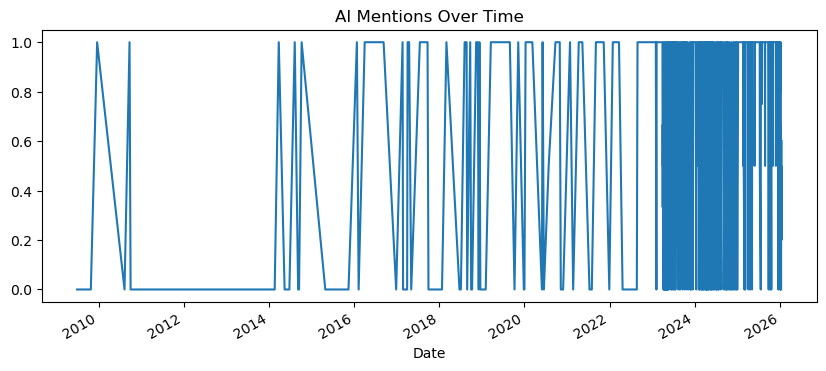

In [40]:
daily_ai.plot(figsize=(10,4), title="AI Mentions Over Time")

In [41]:
source_ai_time = (
    df.groupby(["Date", "Source"])["is_ai"]
    .mean()
    .unstack()
)

<Axes: xlabel='Date'>

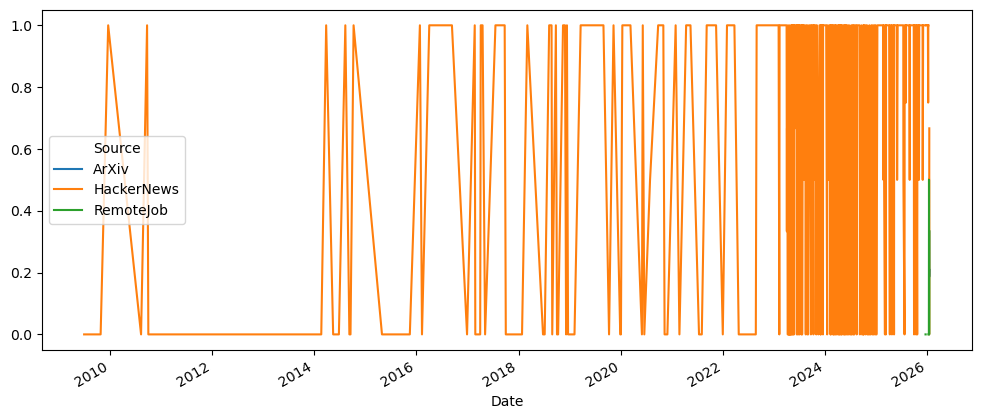

In [42]:
source_ai_time.plot(figsize=(12,5))

**Interpretation:**
Mentions of AI and agents increase in frequency in recent years,
with community-driven sources leading visibility.

In [43]:
df["is_agent"] = df["Title"].str.contains("agent", case=False, na=False)

<Axes: title={'center': 'Agent Mentions Over Time'}, xlabel='Date'>

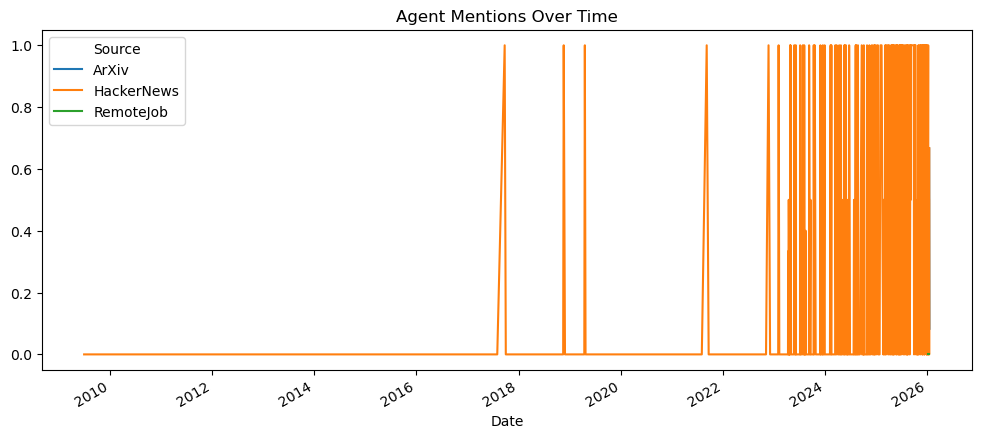

In [44]:
agent_trend = (
    df.groupby(["Date", "Source"])["is_agent"]
    .mean()
    .unstack()
)
agent_trend.plot(figsize=(12,5), title="Agent Mentions Over Time")

<Axes: xlabel='Date'>

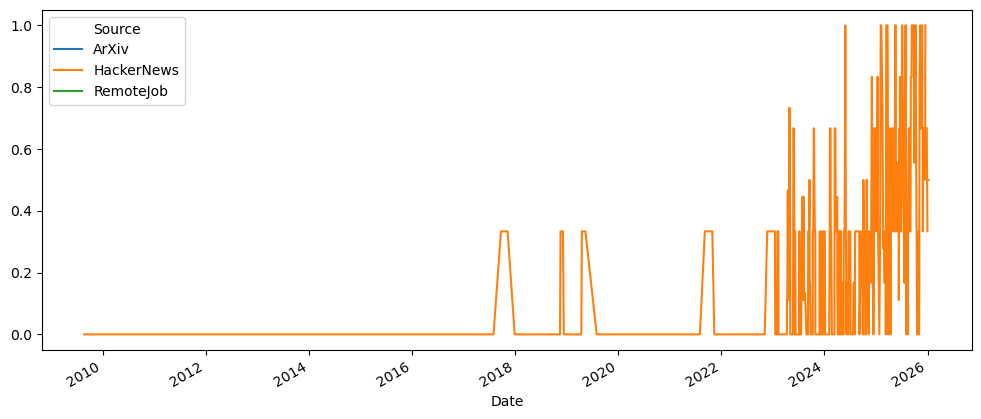

In [45]:
agent_trend.rolling(3).mean().plot(figsize=(12,5))

## 10. Summary and Business Interpretation

This analysis suggests that AI Agents are currently driven by
research output and community exploration, with limited but emerging
commercial hiring demand.

The ecosystem appears to be transitioning from theoretical development
toward selective experimentation rather than mass enterprise adoption.

---